In [1]:
import pandas as pd

df = pd.read_csv("owid-covid-data.csv")
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'].isin(['Kenya', 'United States', 'India'])]
df = df[['date', 'location', 'total_cases', 'total_deaths', 'total_vaccinations']]
df = df.dropna(subset=['total_cases'])
df = df.fillna(0)


In [ ]:

import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
countries_of_interest = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries_of_interest)]
df = df.dropna(subset=['date', 'total_cases', 'total_deaths'])
df['date'] = pd.to_datetime(df['date'])
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


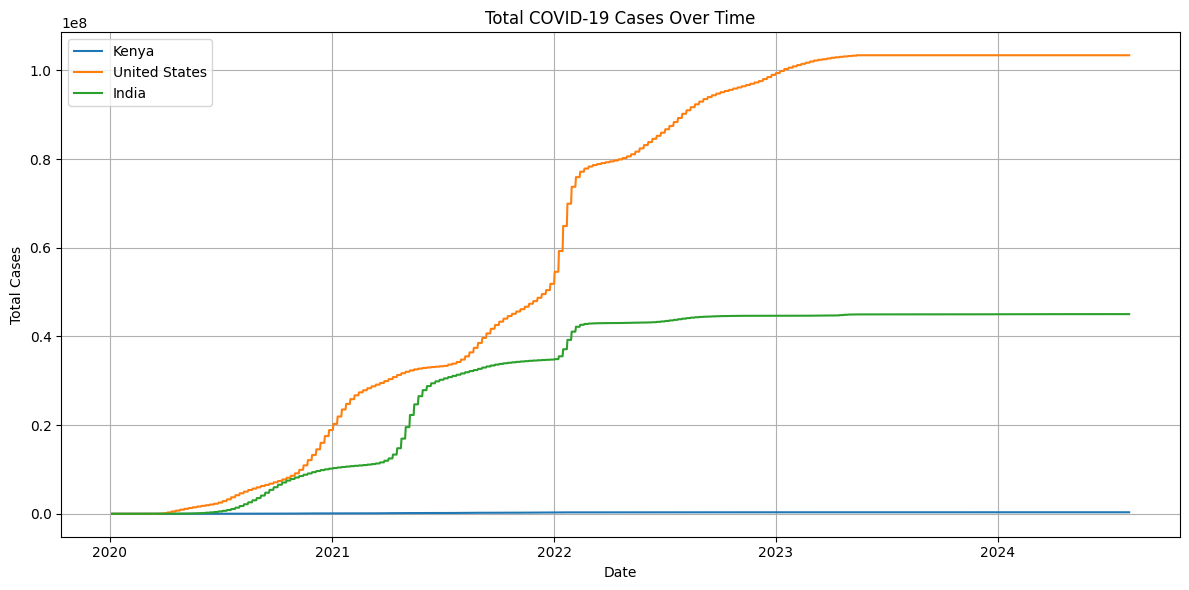

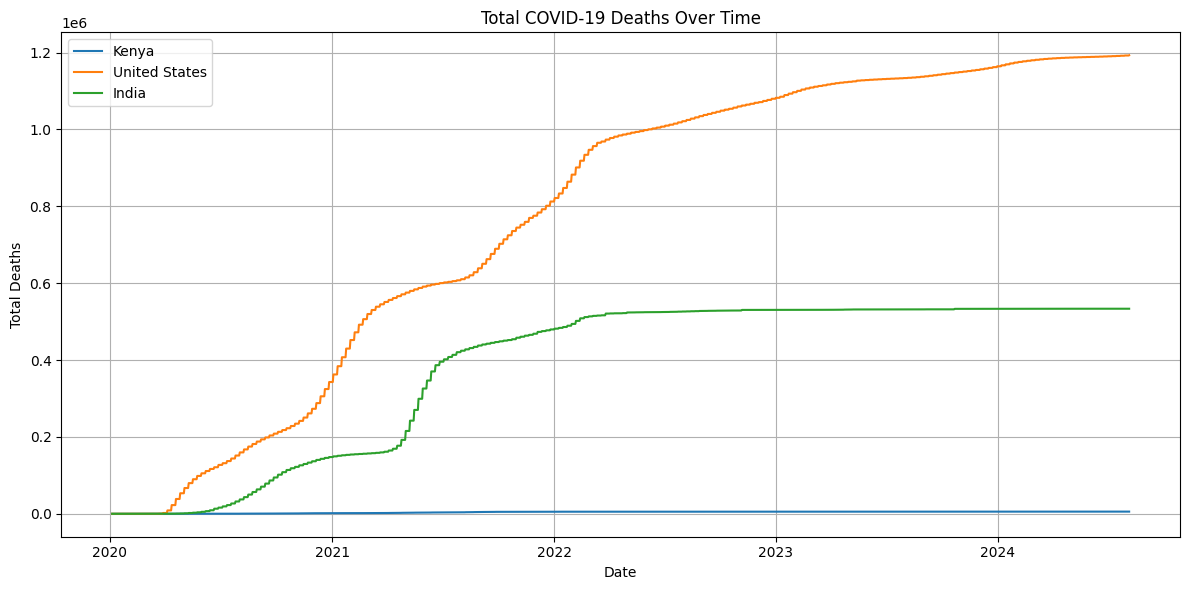

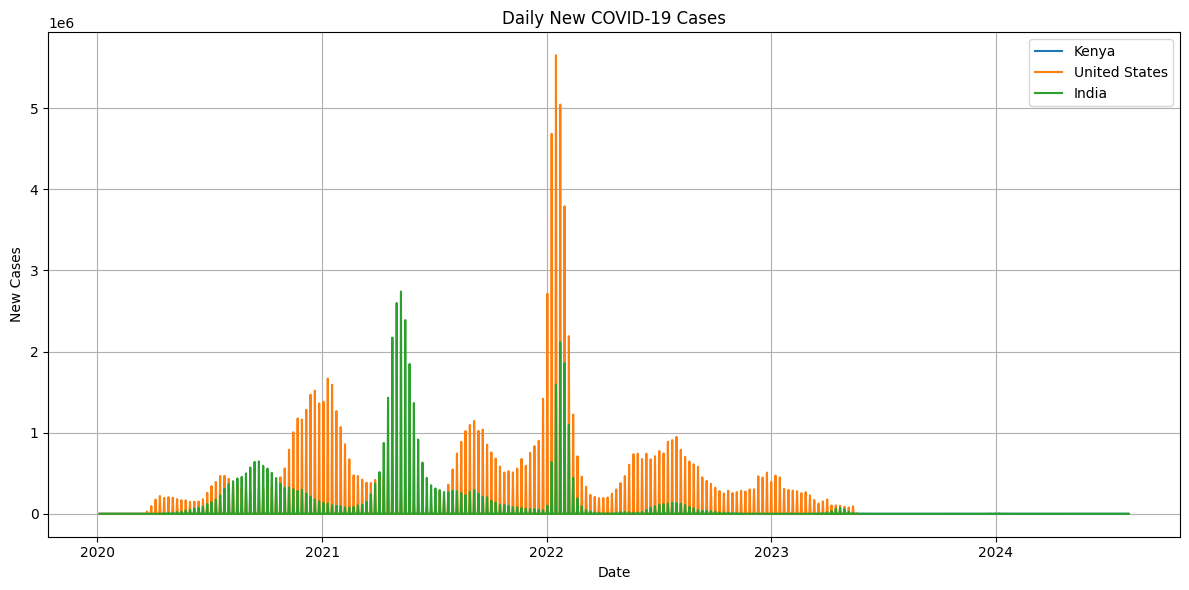

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]
top_countries = latest_df.groupby('location')['total_cases'].max().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title(f"Top 10 Countries by Total Cases as of {latest_date.date()}")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
corr = df[['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


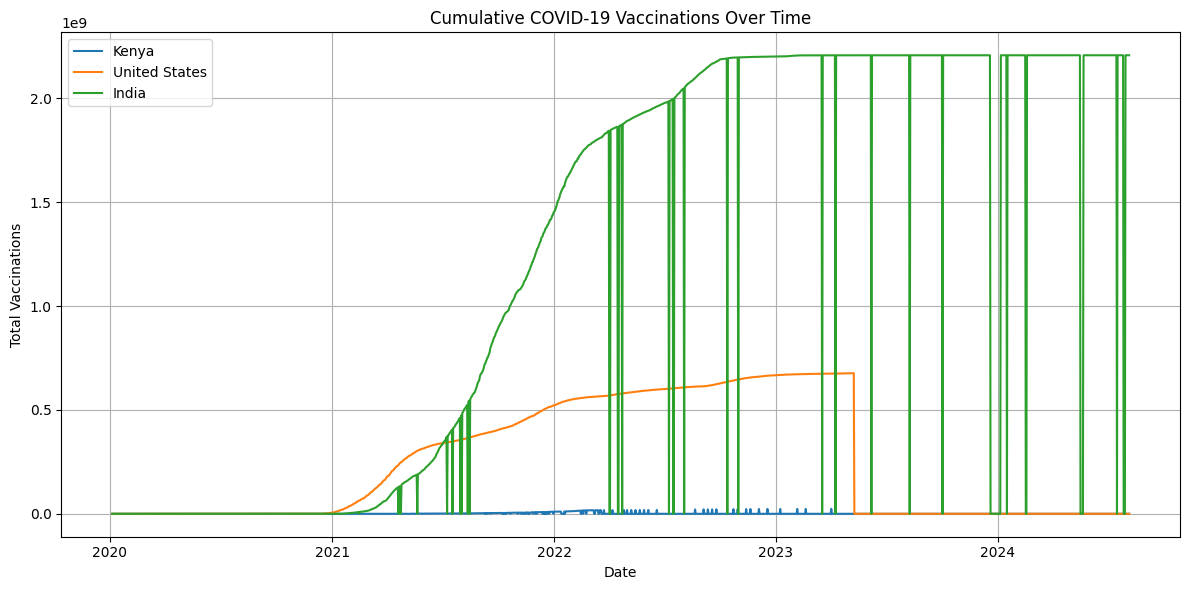

C:\Users\USER\AppData\Local\Temp\ipykernel_11304\1913869118.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='% vaccinated', y='location', data=latest_df, palette='Blues_r')


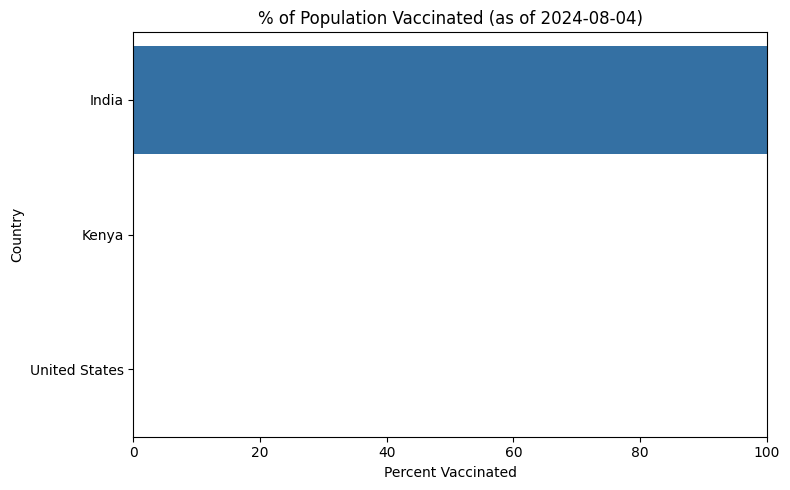

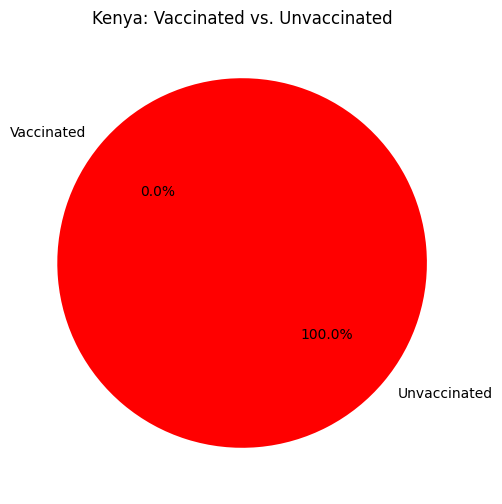

In [9]:
plt.figure(figsize=(12, 6))

for country in ['Kenya', 'United States', 'India']:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date].copy()
latest_df = latest_df[latest_df['location'].isin(['Kenya', 'United States', 'India'])]

# Calculate % vaccinated
latest_df['% vaccinated'] = (latest_df['total_vaccinations'] / latest_df['population']) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x='% vaccinated', y='location', data=latest_df, palette='Blues_r')

plt.title(f"% of Population Vaccinated (as of {latest_date.date()})")
plt.xlabel("Percent Vaccinated")
plt.ylabel("Country")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()
kenya_data = latest_df[latest_df['location'] == 'Kenya'].iloc[0]
vaccinated = kenya_data['total_vaccinations']
unvaccinated = kenya_data['population'] - vaccinated

plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated], labels=["Vaccinated", "Unvaccinated"], 
        autopct='%1.1f%%', colors=['green', 'red'], startangle=140)

plt.title("Kenya: Vaccinated vs. Unvaccinated")
plt.show()


In [10]:
import plotly.express as px
latest_date = df['date'].max()
choropleth_df = df[(df['date'] == latest_date) & (df['iso_code'].str.len() == 3)]
choropleth_df['percent_vaccinated'] = (choropleth_df['total_vaccinations'] / choropleth_df['population']) * 100
fig = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title=f"Total COVID-19 Cases by Country as of {latest_date.date()}",
)

fig.show()
fig = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="percent_vaccinated",
    hover_name="location",
    color_continuous_scale="Greens",
    title=f"% Vaccinated Population by Country as of {latest_date.date()}",
)

fig.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2963842898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choropleth_df['percent_vaccinated'] = (choropleth_df['total_vaccinations'] / choropleth_df['population']) * 100
